In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api

In [2]:
%matplotlib inline 

In [3]:
df_airline= pd.read_csv('airline_passengers.csv')

Justing having glance at data

In [4]:
df_airline.head()


,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


Checking for null values

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

Handling Null Values

In [7]:
df_airline = df_airline.dropna()

Having General infromation about dataset

In [8]:
df_airline.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            134, 135, 136, 137, 138, 139, 140, 141, 142, 143],
           dtype='int64', length=144)

In [9]:

df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.shape


(144, 2)

In [11]:
df_airline.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [12]:
df_airline.columns

Index(['Month', 'Thousands of Passengers'], dtype='object')

In [13]:
df_airline.loc[1:10]

,Month,Thousands of Passengers
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
5,1949-06-01,135.0
6,1949-07-01,148.0
7,1949-08-01,148.0
8,1949-09-01,136.0
9,1949-10-01,119.0
10,1949-11-01,104.0


In [14]:

df_airline = df_airline.set_index('Month')


In [15]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [16]:
df_airline.shape

(144, 1)

<AxesSubplot:xlabel='Month'>

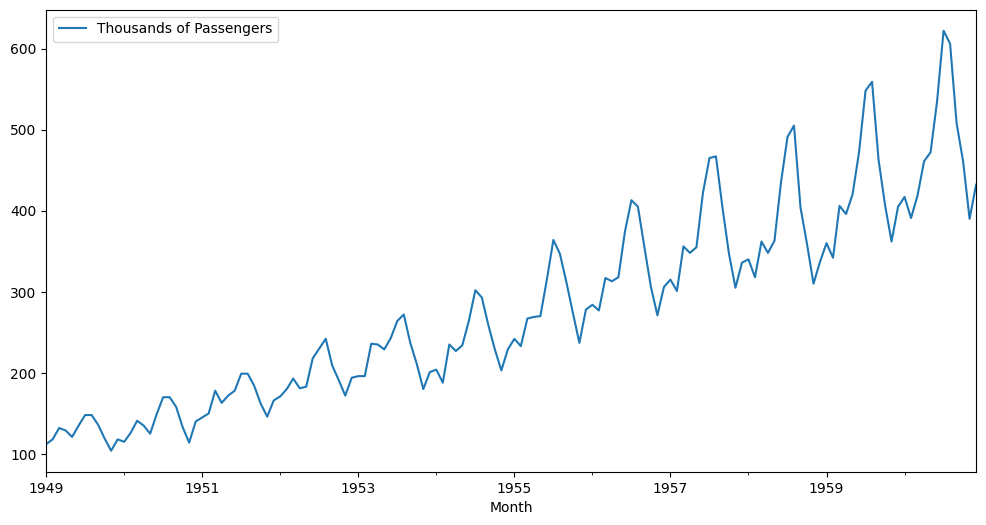

In [17]:
df_airline.plot(figsize = (12,6))

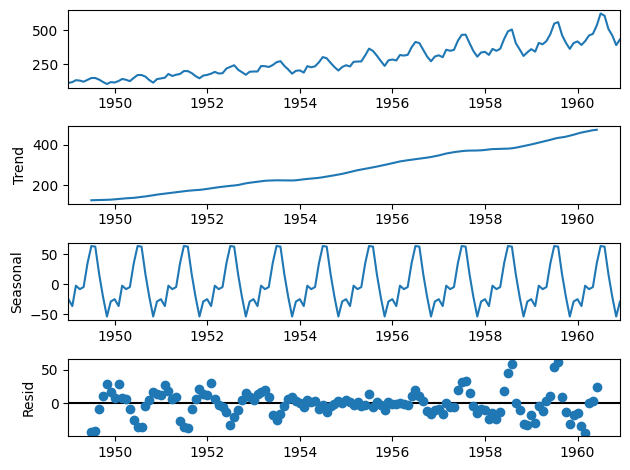

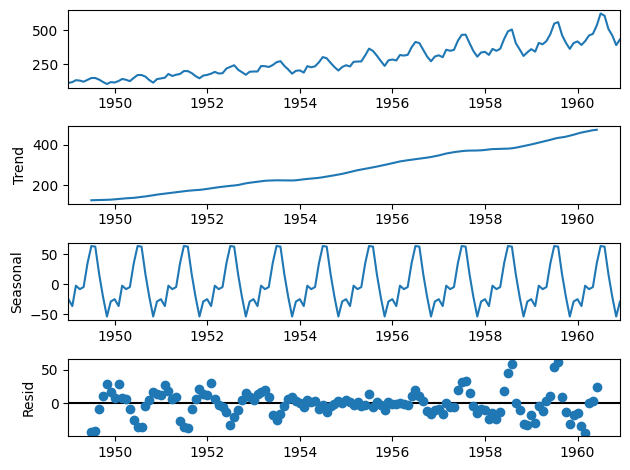

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_airline)
result.plot()

Applying Dickey-Fuller Test to check Stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller


In [20]:
adf,pval,usedlag,nobs,crit_vals,icbest = adfuller(df_airline['Thousands of Passengers'])

In [21]:
print(pval)

0.9918802434376408


This value of p implies that the data is not stationary so we need to make it stationary using differencing

In [22]:
df_airline['Passengers first difference']= df_airline['Thousands of Passengers']- df_airline['Thousands of Passengers'].shift(1)

In [23]:
df_airline['Passengers first difference']

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers first difference, Length: 144, dtype: float64

In [24]:
adf,pval,usedlag,nobs,crit_vals,icbest = adfuller((df_airline['Passengers first difference']).dropna())

In [25]:
print(pval)

0.05421329028382621


Still the data is Non-Stationary so further differencing is required 

In [26]:
df_airline['Passengers second difference']= df_airline['Passengers first difference']- df_airline['Passengers first difference'].shift(1)

In [27]:
df_airline['Passengers second difference']

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01      8.0
1949-04-01    -17.0
1949-05-01     -5.0
              ...  
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: Passengers second difference, Length: 144, dtype: float64

In [28]:
adf,pval,usedlag,nobs,crit_vals,icbest = adfuller((df_airline['Passengers second difference']).dropna())
print(pval)

2.732891850014085e-29


Now the p value is less than 0.05 this concludes that the data is Stationary. Also d = 2

In [29]:
df_airline.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [30]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

c:\python 3.7\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


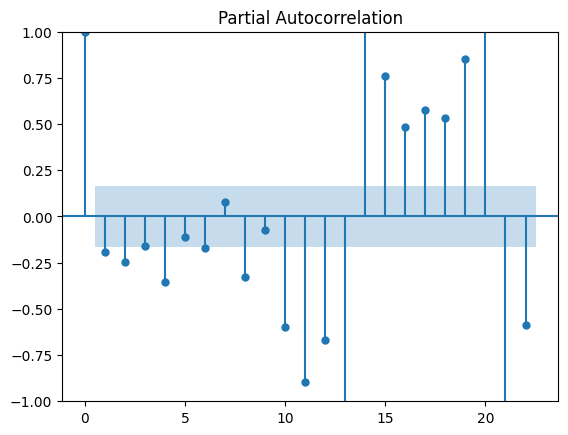

In [31]:
pacf = plot_pacf((df_airline['Passengers second difference']).dropna())

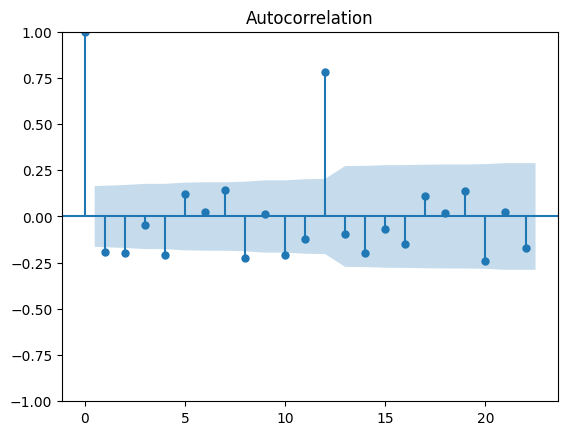

In [32]:
acf = plot_acf((df_airline['Passengers second difference']).dropna())

In [33]:
df_airline['Passengers 12th difference']= df_airline['Passengers first difference']- df_airline['Passengers first difference'].shift(12)

In [34]:
df_airline['Passengers 12th difference']

Month
1949-01-01     NaN
1949-02-01     NaN
1949-03-01     NaN
1949-04-01     NaN
1949-05-01     NaN
              ... 
1960-08-01   -27.0
1960-09-01    -2.0
1960-10-01     9.0
1960-11-01   -26.0
1960-12-01    -1.0
Name: Passengers 12th difference, Length: 144, dtype: float64

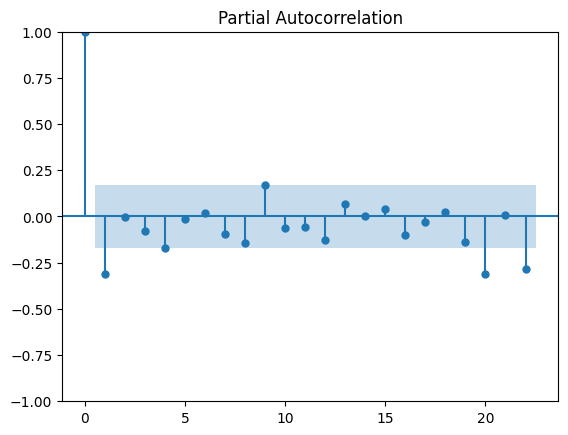

In [35]:
pacf = plot_pacf((df_airline['Passengers 12th difference']).dropna())

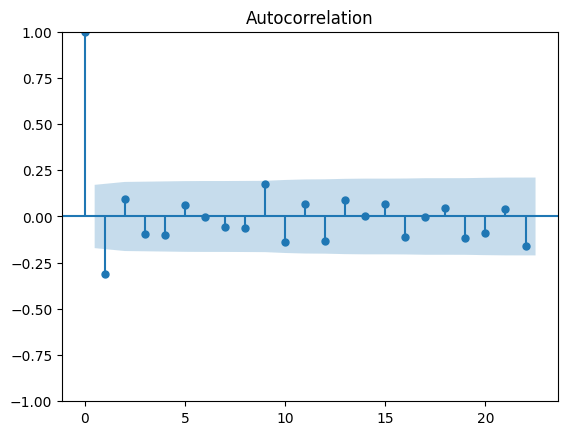

In [36]:
acf = plot_acf((df_airline['Passengers 12th difference']).dropna())

Train-Test Split

In [37]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [38]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [39]:
pred_start_date= test_data.index[0]
pred_end_date = test_data.index[-1]

# Defining the ARIMA Model

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [75]:
model_ARIMA = statsmodels.tsa.arima.model.ARIMA(train_data['Thousands of Passengers'],order =(12,2,12))

c:\python 3.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python 3.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python 3.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Training the model i.e fitting the model

In [76]:
model_ARIMA_fit = model_ARIMA.fit()

c:\python 3.7\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python 3.7\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python 3.7\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [77]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(12, 2, 12)   Log Likelihood                -306.223
Date:                     Thu, 25 May 2023   AIC                            662.445
Time:                             00:02:39   BIC                            722.613
Sample:                         01-01-1949   HQIC                           686.602
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3294      0.813     -0.405      0.685      -1.923       1.264
ar.L2         -0.5924      0.749     -0.791      0.429      -2.060       0.875
ar.L3         -0.3796      0.771     -0.492      0.622      -1.891       1.131
ar.L4         -0.5011      0.716     -0.700      0.484      -1.904       0.902
ar.L5         -0.4702      0.750     -0.627      0.531      -1.940       1.000
ar.L6         -0.3758      0.789     -0.476      0.634      -1.922       1.170
ar.L7         -0.5336      0.657     -0.812      0.417      -1.821       0.754
ar.L8         -0.4415      0.763     -0.579      0.563      -1.936       1.053
ar.L9         -0.5141      0.722     -0.712      0.477      -1.930       0.902
ar.L10        -0.4536      0.769     -0.590      0.555      -1.961       1.053
ar.L11        -0.3804      0.712     -0.534      0.593      -1.777       1.016
ar.L12         0.3539      0.659      0.537      0.591      -0.938       1.646
ma.L1         -0.8651      0.923     -0.937      0.349      -2.675       0.945
ma.L2          0.2990      1.093      0.274      0.784      -1.844       2.442
ma.L3         -0.4680      1.190     -0.393      0.694      -2.801       1.865
ma.L4          0.2880      1.283      0.224      0.822      -2.227       2.803
ma.L5         -0.0174      1.430     -0.012      0.990      -2.820       2.786
ma.L6         -0.2217      1.473     -0.151      0.880      -3.108       2.665
ma.L7          0.4035      1.289      0.313      0.754      -2.123       2.930
ma.L8         -0.5164      1.079     -0.479      0.632      -2.630       1.598
ma.L9          0.6574      0.816      0.805      0.421      -0.942       2.257
ma.L10        -0.5796      0.616     -0.940      0.347      -1.788       0.629
ma.L11         0.2752      0.486      0.566      0.571      -0.678       1.228
ma.L12        -0.1914      0.387     -0.495      0.621      -0.950       0.567
sigma2        77.0333     26.997      2.853      0.004      24.121     129.946
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.84   Prob(JB):                         0.36
Heteroskedasticity (H):               2.23   Skew:                             0.38
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Prediction on test data

In [78]:
pred = model_ARIMA_fit.predict(start =pred_start_date,end= pred_end_date)

#### Calculating the residuals

In [79]:
residuals = test_data['Thousands of Passengers']-pred

In [80]:
test_data['Predicted ARIMA'] = pred             #adding a column as Predicted ARIMA

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Comparing the predicted value and actual value on test data

<AxesSubplot:xlabel='Month'>

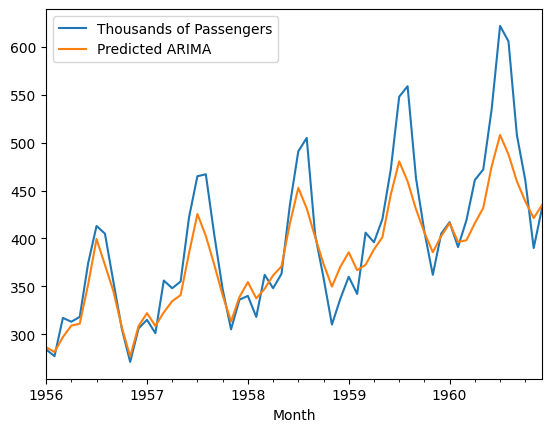

In [81]:
test_data[['Thousands of Passengers','Predicted ARIMA']].plot()

## Now, Creating a SARIMA Model

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
model_SARIMA = SARIMAX(train_data['Thousands of Passengers'],order = (3,0,5),seasonal_order = (1,1,1,12))

c:\python 3.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python 3.7\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
model_SARIMA_fit = model_SARIMA.fit()

c:\python 3.7\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [85]:
pred_sarima = model_SARIMA_fit.predict(start = pred_start_date,end = pred_end_date)

In [86]:
test_data['sarima Prediction'] = pred_sarima

c:\python 3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

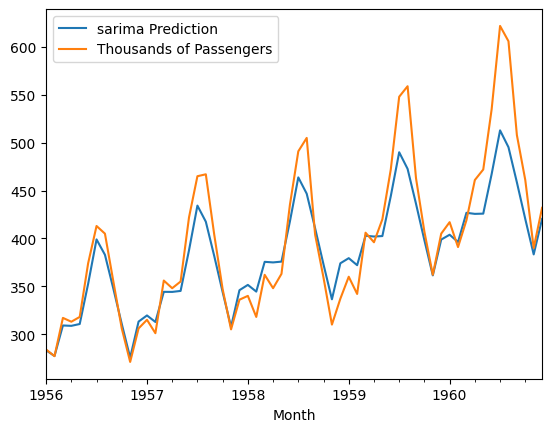

In [87]:
test_data[['sarima Prediction','Thousands of Passengers']].plot()